In [1]:
# import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base =  automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# 1. Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
most_recent_date

'2017-08-23'

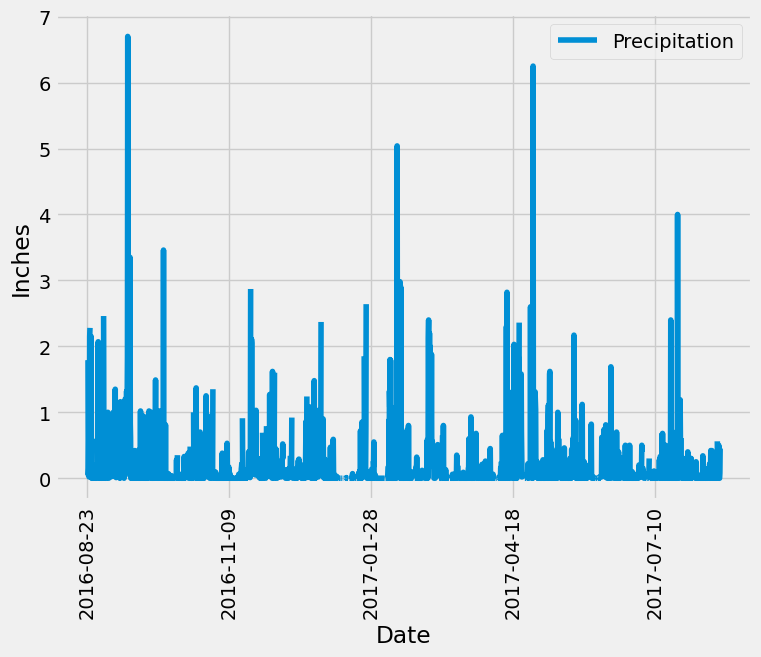

In [ ]:
# 2. Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d").date()

# Calculate the date one year from the last date in data set.
query_date = most_recent_date - dt.timedelta(days = 365)

# 3. Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.date <= most_recent_date).all()

# 4. Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precipitation_data, columns=["Date","Precipitation"])

# 5. Sort the dataframe by date
precip_df.sort_values("Date", inplace = True)

# 6. Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x = 'Date', y='Precipitation', figsize=(8,6), ylabel="Inches", rot=90)
plt.show()

In [ ]:
# 7. Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# 1. Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [ ]:
# 2. Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
#Station that has the greatest number of observation
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()[0]
print(f"Station {most_active_station} has the greatest number of observations.")

Station USC00519281 has the greatest number of observations.


In [15]:
# 3. Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
            filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

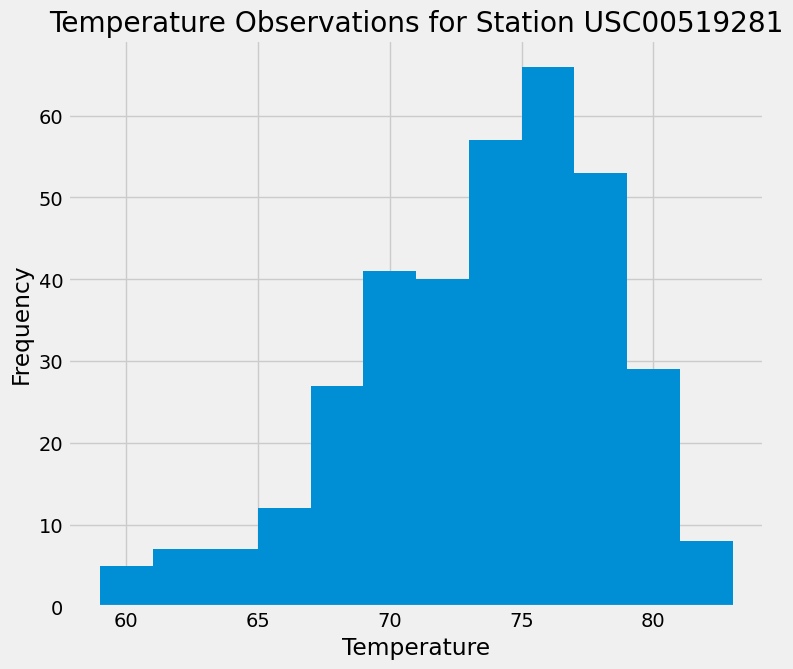

In [16]:
# 4. Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.date <= most_recent_date).\
    filter(Measurement.station == most_active_station).all()

temperature_values = [temp[0] for temp in temperature_data]
plt.figure(figsize=(8, 7))
plt.hist(temperature_values, bins=12)
plt.title(f"Temperature Observations for Station {most_active_station}")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [17]:
# 5. Close Session
session.close()